<a href="https://colab.research.google.com/github/merttguney/AI_106/blob/main/Gorev11_Mert_G%C3%BCney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Görev-11:
**Emlak datasetini lineer regresyonla modelleyin ve metriklerini oluşturun (ölçekli ve ölçeksiz)**

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [79]:
df = pd.read_csv("Emlak_limitli_sutun.csv")
df

,SalePrice,Garage Cars,Gr Liv Area,Overall Qual,Year Built,Lot Area
0,215000,2.0,1656,6,1960,31770
1,105000,1.0,896,5,1961,11622
2,172000,1.0,1329,6,1958,14267
3,244000,2.0,2110,7,1968,11160
4,189900,2.0,1629,5,1997,13830
...,...,...,...,...,...,...
2920,142500,2.0,1003,6,1984,7937
2921,131000,2.0,902,5,1983,8885
2922,132000,0.0,970,5,1992,10441
2923,170000,2.0,1389,5,1974,10010


In [80]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SalePrice,2925.0,180815.537436,79951.696564,12789.0,129500.0,160000.0,213500.0,755000.0
Garage Cars,2925.0,1.765812,0.760378,0.0,1.0,2.0,2.0,5.0
Gr Liv Area,2925.0,1495.883077,492.119547,334.0,1126.0,1442.0,1740.0,4476.0
Overall Qual,2925.0,6.091624,1.406386,1.0,5.0,6.0,7.0,10.0
Year Built,2925.0,1971.323761,30.228826,1872.0,1954.0,1973.0,2000.0,2010.0
Lot Area,2925.0,10109.861538,7785.509739,1300.0,7438.0,9430.0,11526.0,215245.0


In [81]:
df.columns

Index(['SalePrice', 'Garage Cars', 'Gr Liv Area', 'Overall Qual', 'Year Built',
       'Lot Area'],
      dtype='object')

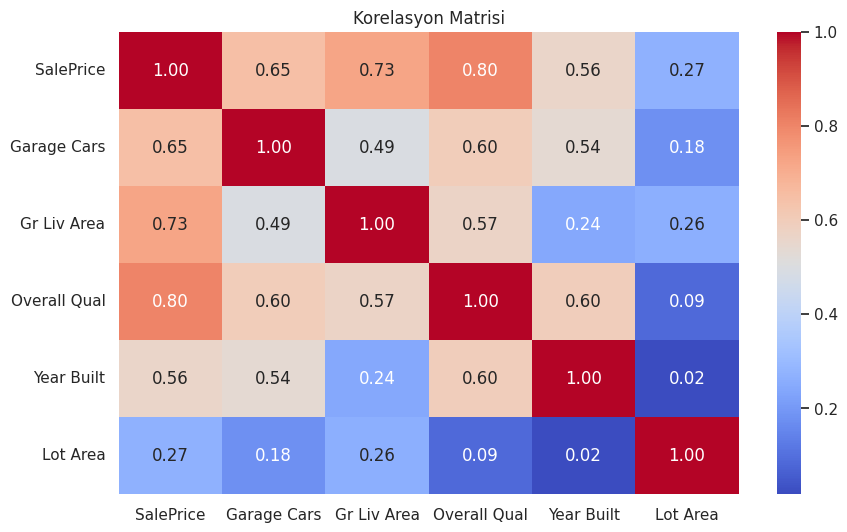

In [82]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()

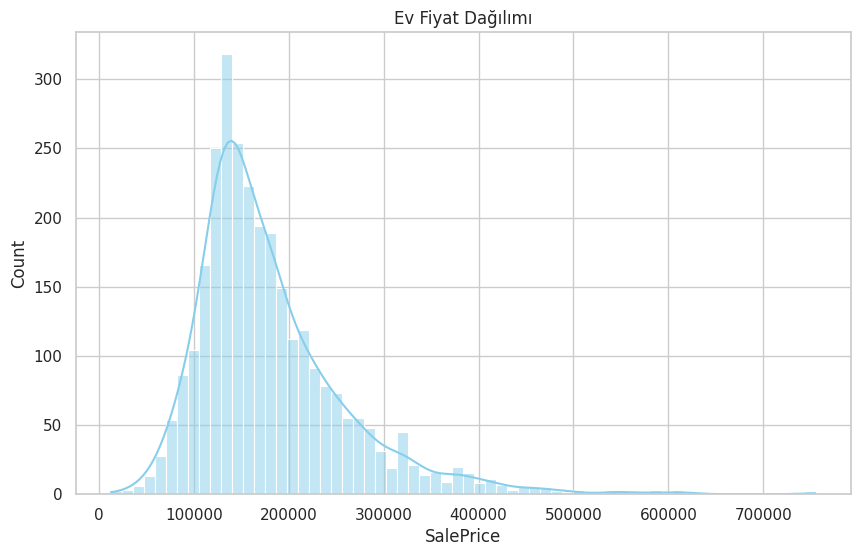

In [83]:
sns.histplot(df["SalePrice"], kde=True, color="skyblue")
plt.title("Ev Fiyat Dağılımı")
plt.show()

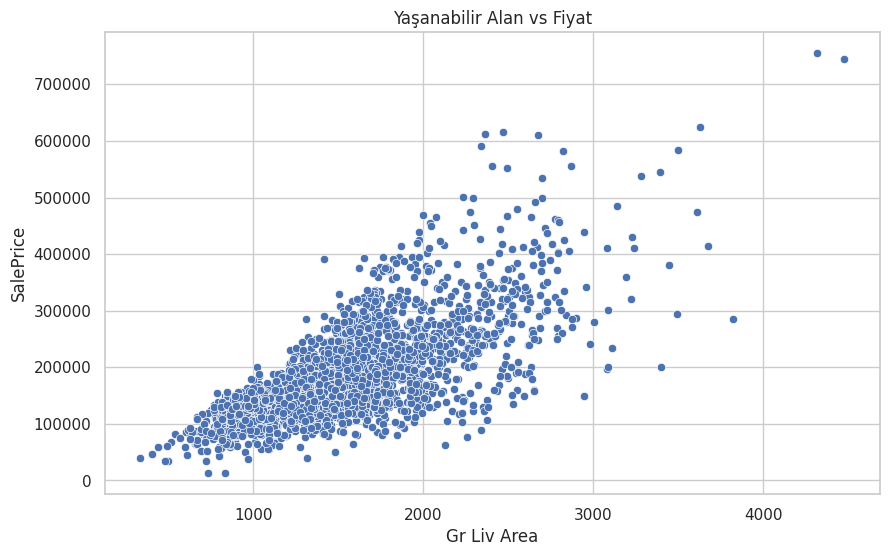

In [84]:
sns.scatterplot(x="Gr Liv Area", y="SalePrice", data=df)
plt.title("Yaşanabilir Alan vs Fiyat")
plt.show()

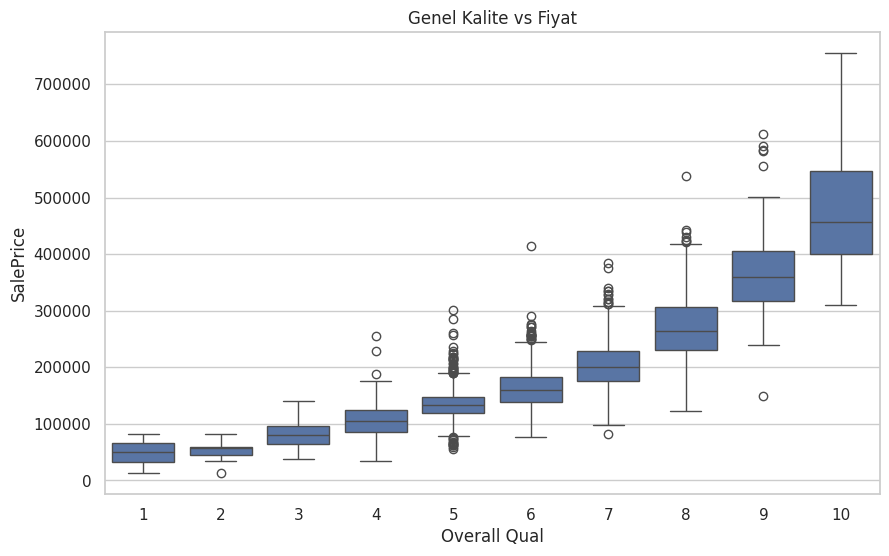

In [85]:
sns.boxplot(x="Overall Qual", y="SalePrice", data=df)
plt.title("Genel Kalite vs Fiyat")
plt.show()

In [86]:
# Outlier Temizleme Kısmımız burada

# IQR yöntemi
iqr_df = df.copy()
for col in iqr_df.columns:
    Q1 = iqr_df[col].quantile(0.25)
    Q3 = iqr_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    iqr_df = iqr_df[(iqr_df[col] >= lower) & (iqr_df[col] <= upper)]

# Manuel yöntem (±3 std)
manual_df = df.copy()
for col in manual_df.columns:
    mean = manual_df[col].mean()
    std = manual_df[col].std()
    manual_df = manual_df[(manual_df[col] >= mean - 3*std) & (manual_df[col] <= mean + 3*std)]

In [87]:
# Orijinal Veri
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
# Ölçeksiz
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_raw = lr.predict(X_test)

In [90]:
print("Orijinal - Ölçeksiz")
print("R2: ", r2_score(y_test, y_pred_raw))
print("MSE:", mean_squared_error(y_test, y_pred_raw))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_raw)))
print("MAE:", mean_absolute_error(y_test, y_pred_raw))

Orijinal - Ölçeksiz
R2:  0.7852283201951604
MSE: 1525574988.9695275
RMSE: 39058.60966508572
MAE: 26226.997378592245


In [91]:
# Ölçekli
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [92]:
print("Orijinal - Ölçekli")
print("R2: ", r2_score(y_test, y_pred_scaled))
print("MSE:", mean_squared_error(y_test, y_pred_scaled))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_scaled)))
print("MAE:", mean_absolute_error(y_test, y_pred_scaled))

Orijinal - Ölçekli
R2:  0.7852283201951572
MSE: 1525574988.9695501
RMSE: 39058.609665086005
MAE: 26226.99737859252


In [93]:
# IQR Verisi ile
X = iqr_df.drop("SalePrice", axis=1)
y = iqr_df["SalePrice"]

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
# Ölçeksiz
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_raw = lr.predict(X_test)

In [96]:
print("IQR - Ölçeksiz")
print("R2: ", r2_score(y_test, y_pred_raw))
print("MSE:", mean_squared_error(y_test, y_pred_raw))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_raw)))
print("MAE:", mean_absolute_error(y_test, y_pred_raw))

IQR - Ölçeksiz
R2:  0.8048569711133622
MSE: 586305348.5843198
RMSE: 24213.742969320538
MAE: 18004.327178502546


In [97]:
# Ölçekli
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [98]:
lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [99]:
print("IQR - Ölçekli")
print("R2: ", r2_score(y_test, y_pred_scaled))
print("MSE:", mean_squared_error(y_test, y_pred_scaled))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_scaled)))
print("MAE:", mean_absolute_error(y_test, y_pred_scaled))

IQR - Ölçekli
R2:  0.8048569711133625
MSE: 586305348.5843186
RMSE: 24213.742969320516
MAE: 18004.32717850252


In [100]:
# Manuel Verisi ile
X = manual_df.drop("SalePrice", axis=1)
y = manual_df["SalePrice"]

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42);

In [102]:
# Ölçeksiz
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_raw = lr.predict(X_test)

In [103]:
print("Manuel - Ölçeksiz")
print("R2: ", r2_score(y_test, y_pred_raw))
print("MSE:", mean_squared_error(y_test, y_pred_raw))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_raw)))
print("MAE:", mean_absolute_error(y_test, y_pred_raw))

Manuel - Ölçeksiz
R2:  0.8107040082764809
MSE: 981034458.0529245
RMSE: 31321.46960238176
MAE: 23206.522613789595


In [104]:
# Ölçekli
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [105]:
lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [106]:
print("Manuel - Ölçekli")
print("R2: ", r2_score(y_test, y_pred_scaled))
print("MSE:", mean_squared_error(y_test, y_pred_scaled))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_scaled)))
print("MAE:", mean_absolute_error(y_test, y_pred_scaled))

Manuel - Ölçekli
R2:  0.8107040082764818
MSE: 981034458.0529205
RMSE: 31321.469602381694
MAE: 23206.522613789628


<ipython-input-107-8299818b23a4>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=scores, palette="mako")


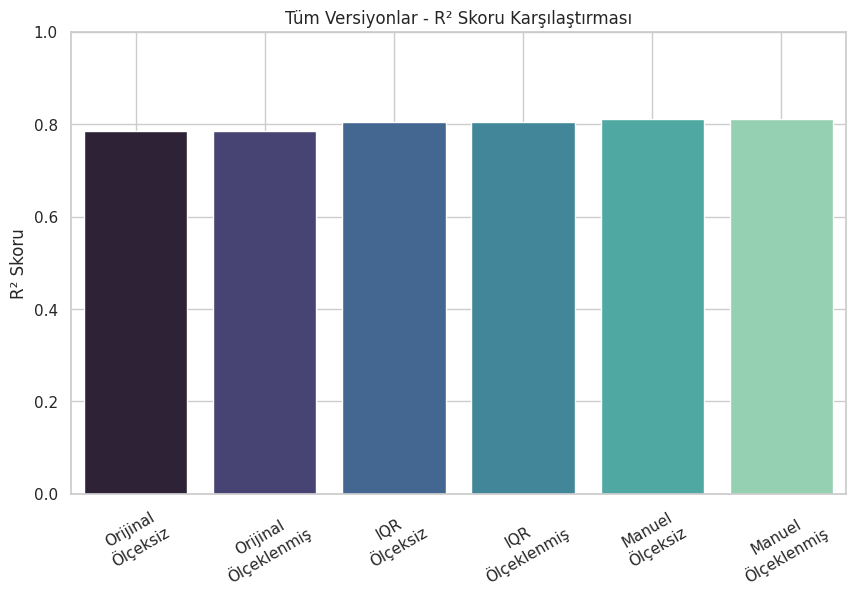

In [107]:
labels = [
    "Orijinal\nÖlçeksiz",
    "Orijinal\nÖlçeklenmiş",
    "IQR\nÖlçeksiz",
    "IQR\nÖlçeklenmiş",
    "Manuel\nÖlçeksiz",
    "Manuel\nÖlçeklenmiş"
]

scores = [
    0.7852283201951604,  # Skorları manuel olarak kendim ekledim.
    0.7852283201951572,
    0.8048569711133622,
    0.8048569711133625,
    0.8107040082764809,
    0.8107040082764818
]

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=scores, palette="mako")
plt.title("Tüm Versiyonlar - R² Skoru Karşılaştırması")
plt.ylabel("R² Skoru")
plt.ylim(0, 1)
plt.grid(True)
plt.xticks(rotation=30)
plt.show()


**Verimiz zaten temiz ve dengeliydi ama çok ufak farklılık bile olsa buradan şu yorumu çıkarırız, Outlier'lar modeli bozacak kadar etkili değilmiş**